<img src="logo.png" width="240" height="100" align="left"/>  </div> <div style="text-align: right"> <div style="font-size: 18px;"> Máster Universitario en Visión Artificial</span></div></div> 

# <div style="text-align: center"> <div style="font-size: 32px;"> <span style="color:#365275"> <strong>Práctica Imagen Médica: Mediapipe Hands</span> </div>


<div style="text-align: justify;">

Como hemos visto en clase, en el ámbito clínico la escala MDS-UPDRS es ampliamente utilizada para la evaluación de la enfermedad de Parkinson. Entre las pruebas incluidas en esta escala para la valoración de la bradicinesia en miembro superior se encuentra el <strong>Finger Tapping Test</strong>. Como puede observarse en este **[vídeo](https://www.youtube.com/shorts/rTOcc4R7yb4)**, esta prueba consiste en llevar a cabo el golpeteo del <strong>dedo índice</strong> con el pulgar durante <strong>al menos 10 veces</strong> tan rápida y ampliamente como sea posible.  Por medio de esta prueba, los neurólogos pretenden evaluar aspectos como la amplitud, velocidad, titubeos, interrupciones y disminución de la amplitud del movimiento, explorando cada mano por separado.

El objetivo de esta práctica es realizar una simulación de la automatización de esta prueba por medio de la adquisición de vídeos de corta duración que posteriormente serán procesados empleando una de las herramientas de detección de keypoints vistas en clase, Mediapipe Hands, a partir de la cual será posible automatizar la estimación de los parámetros previamente enumerados.
Para la consecución de la práctica propuesta se plantean las siguientes tareas:
</div>

   1. <div style="text-align: justify;"> Adquisición de 2 vídeos cortos realizando la tarea Finger Tapping Test. Inicialmente se adquirirá un vídeo realizando el movimiento lo más amplio y rápido posible. Posteriormente, se deberá grabar otro vídeo en el que se simule un escenario de bradicinesia típico que puede observarse como consecuencia de la presencia de la enfermedad de Pakinson. Para ello se deberán introducir durante la ejecución de la prueba interrupciones en el movimiento, titubeos, así como disminución de la velocidad y amplitud del movimiento. </div>

<div style="text-align: justify; border-left: 10px solid #FFA500; padding: 10px; background-color: #FFF3CD; width: 100%; font-size: 16px;"> <strong>Nota:</strong> se recomienda que el dispositivo utilizado para adquirir los vídeos, ya sea una cámara o móvil permanezca estático durante la grabación, con el objetivo de poder caracterizar adecuadamente el movimiento. Por otro lado, se recomienda que la persona se encuentre próxima a la cámara con el objetivo de facilitar la detección de los keypoints de interés. Finalmente, sólo debe observarse una mano en escena, pues está en esta prueba se valoran las manos por separado. </div>

2. <div style="text-align: justify;"> Detección de keypoints de la mano empleando la herramienta <strong>Mediapipe Hands</strong>. Una vez se hayan identificado los diferentes landmarks asociados a la mano en cada frame, el alumno deberá seleccionar los keypoints que considere oportunos para la caracterización del movimiento en esta prueba. </div>
4.	<div style="text-align: justify;"> Representar gráficamente la posición o distancias de los keypoints de interés en cada frame del vídeo. </div>
5.	<div style="text-align: justify;"> Identificación en la gráfica generada de los golpeteos (taps) realizados durante la prueba. </div>
<div style="text-align: justify; border-left: 10px solid #FFA500; padding: 10px; background-color: #FFF3CD; width: 100%; font-size: 16px;"> <strong> Nota:</strong> para la identificación de los taps se recomienda detectar los picos y valles (máximos y mínimos locales) de la gráfica generada empleando la herramienta del paquete Scipy: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html" target="_blank" style="color: #007BFF; font-weight: bold; text-decoration: none;">
        find_peaks
    </a>. </div>


6.	<div style="text-align: justify;"> Cuantificación de <strong>al menos dos</strong> de las características clínicas de interés que permitan valorar la realización de la prueba: velocidad, amplitud, titubeos, interrupciones y disminución de la amplitud. </div>


<div style="text-align: justify;">

# <div style="text-align: left"> <div style="font-size: 30px;"> <span style="color:#365275"> <strong>Mediapipe Hands</span> </div>

<div style="text-align: justify;">

MediaPipe Hands es una solución de seguimiento de manos y dedos de alta precisión desarrollado por Google. Utiliza aprendizaje automático (ML) para inferir 21 puntos de referencia 3D de una mano a partir de una sola imagen.


</div>

## <span style="background-color:  #c4fbff">Modelos </span>


#### - **Modelo de Detección de Palmas**  

Para detectar la ubicación inicial de las manos, diseñaron un modelo de detector de una sola toma (*single-shot detector*) optimizado para su uso en tiempo real en dispositivos móviles, de manera similar al modelo de detección facial en **MediaPipe Face Mesh**. Detectar manos es una tarea decididamente compleja: tanto el modelo liviano como el modelo completo deben funcionar en una amplia variedad de tamaños de manos con una gran variabilidad de escala (~20x) en relación con el marco de la imagen, además de poder detectar manos ocluidas y autoocluídas. Mientras que los rostros presentan patrones de alto contraste, por ejemplo, en las regiones de los ojos y la boca, la falta de tales características en las manos hace que su detección confiable sea más difícil únicamente a partir de sus características visuales. En su lugar, proporcionar contexto adicional, como el brazo, el cuerpo o las características de la persona, ayuda a una localización precisa de la mano.

Este método aborda estos desafíos utilizando diferentes estrategias. Primero, entrenaron un detector de **palmas** en lugar de un detector de manos, ya que estimar los cuadros delimitadores de objetos rígidos como las palmas y los puños es significativamente más simple que detectar manos con dedos articulados. Además, dado que las palmas son objetos más pequeños, el algoritmo de **supresión de no máximos (NMS)** funciona bien incluso en casos de autooclusión de dos manos, como los apretones de manos. Asimismo, las palmas pueden modelarse utilizando **cajas delimitadoras cuadradas** (*anchors* en terminología de aprendizaje automático), ignorando otras relaciones de aspecto y reduciendo así el número de *anchors* en un factor de 3 a 5. En segundo lugar, se emplea un **extractor de características tipo encoder-decoder** para proporcionar una mejor conciencia del contexto de la escena, incluso para objetos pequeños (similar al enfoque **RetinaNet**). Por último, minimizaron la **pérdida focal (focal loss)** durante el entrenamiento para gestionar la gran cantidad de *anchors* resultantes de la alta variabilidad en la escala.  

Con estas técnicas, logran una **precisión promedio del 95.7%** en la detección de palmas. Usando una pérdida de entropía cruzada estándar y sin *decoder*, la precisión base sería de solo **86.22%**.  



#### - **Modelo de Puntos de Referencia de la Mano**  
Después de la detección de la palma en toda la imagen, el modelo de puntos de referencia de la mano realiza una **localización precisa de los 21 puntos clave (véase la imagen) 3D de los nudillos de la mano** dentro de las regiones detectadas, a través de una regresión, es decir, predicción directa de coordenadas. El modelo aprende una representación interna coherente de la postura de la mano y es robusto incluso ante manos parcialmente visibles y autooclusiones.  

Para obtener datos de referencia (*ground truth*), **anotaron manualmente ~30,000 imágenes del mundo real** con 21 coordenadas 3D, como se muestra a continuación (tomaron el valor **Z** del mapa de profundidad de la imagen, si existe, para la coordenada correspondiente). Para cubrir mejor las posibles posturas de la mano y proporcionar una supervisión adicional sobre la naturaleza de la geometría de la mano, también renderizaron un modelo sintético de mano de alta calidad sobre diversos fondos y lo mapearon a sus respectivas coordenadas 3D.

</div>
<img src="hand_landmarks_mediapipe.png" width="800" height="300" align="center"/>




## <span style="background-color:  #c4fbff">Instalación de dependencias </span>

In [1]:
!pip install mediapipe opencv-python matplotlib scipy numpy

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   ------------ --------------------------- 15.7/51.0 MB 82.7 MB/s eta 0:00:01
   -------------------- ------------------- 26.7/51.0 MB 67.9 MB/s eta 0:00:01
   --------------------------------- ------ 42.7/51.0 MB 67.9 MB/s eta 0:00:01
   ---------------------------------------- 51.0/51.0 MB 63.6 MB/s eta 0:00:00
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------  2.4/2.4 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.8 MB ? eta -:--:--
   ------------- -------------------------- 22.0/65.8 MB 106.7 MB/s eta 0:00:01
   -------------------------- ------------- 44.3/65.8 MB 104.4 MB/s eta 0:00:01
   --------

<div style="text-align: justify;">

## <span style="background-color:  #c4fbff">Configuración </span>

La solución de manos de MediaPipe ofrece varias configuraciones que puedes ajustar:

**- static_image_mode:** Si se establece en True, la solución tratará las imágenes de entrada como imágenes estáticas, lo que es útil para procesar imágenes individuales. Si se establece en False, la solución espera una secuencia de vídeo y utiliza la detección continua para mejorar la precisión y el rendimiento.

**- max_num_hands:** Especifica el número máximo de manos que se detectarán y rastrearán. El valor predeterminado es 2.

**- min_detection_confidence:** Valor mínimo de confianza para que la detección de manos sea considerada exitosa. El valor predeterminado es 0.5.

**- min_tracking_confidence:** Valor mínimo de confianza para que el seguimiento de manos sea considerado exitoso. El valor predeterminado es 0.5.

## <span style="background-color:  #c4fbff">Output</span>



#### **multi_hand_landmarks**  

Colección de manos detectadas/rastreadas, donde cada mano se representa como una lista de **21 puntos de referencia** (*landmarks*). Cada punto de referencia está compuesto por **x, y y z**. **x** e **y** están normalizados en el rango **[0.0, 1.0]** según el ancho y alto de la imagen, respectivamente.  **z** representa la profundidad del punto de referencia, tomando la profundidad de la muñeca como el origen. Cuanto menor sea el valor de **z**, más cerca estará el punto de referencia de la cámara.  La magnitud de **z** usa aproximadamente la misma escala que **x**.  

#### **multi_hand_world_landmarks**  

Colección de manos detectadas/rastreadas, donde cada mano se representa como una lista de **21 puntos de referencia** en **coordenadas del mundo real**.  
Cada punto de referencia está compuesto por **x, y y z**, que representan coordenadas 3D en metros con el **origen en el centro geométrico aproximado de la mano**.  

#### **multi_handedness**  

Colección que indica la lateralidad de las manos detectadas/rastreadas (**si es una mano izquierda o derecha**). Cada mano tiene dos atributos. **label**: una cadena de texto con el valor **Left** (Izquierda) o **Right** (Derecha).  **score**: la **probabilidad estimada** de la lateralidad predicha. Este valor es siempre mayor o igual a **0.5** (y la probabilidad de la mano opuesta es **1 - score**).  

**Nota:** La lateralidad (**handedness**) se determina **asumiendo que la imagen de entrada está reflejada**, es decir, capturada con una **cámara frontal/selfie** con las imágenes volteadas horizontalmente. Si este no es el caso, la aplicación debe **intercambiar** la salida de la lateralidad.
</div>

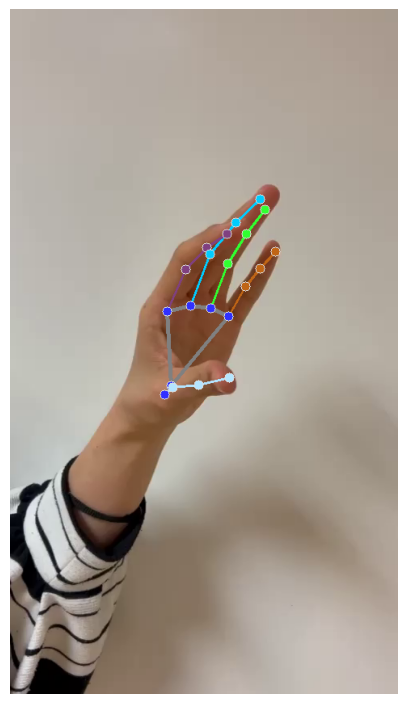

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import medfilt

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

show_plot = True

# For video input:

video_path = 'video_bueno.mp4'
cap = cv2.VideoCapture(video_path)
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True

    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    # Flip the image horizontally for a selfie-view display.

    if show_plot:
        plt.figure(figsize=(5,10))
        plt.imshow(cv2.flip(image, 1))
        plt.axis('off')
        plt.show()


    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    show_plot = False
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

##### Se observa como detecta correctamente los puntos clave de los 5 dedos. Se busca obtener la posición de la primera falange del índice y del pulgar, para evaluar los taps. Se calcula la distancia euclídea entre dichos puntos obteniendo la separación entre ellos y cuando esta distancia sea muy pequeña, se considerara la presencia de tap.

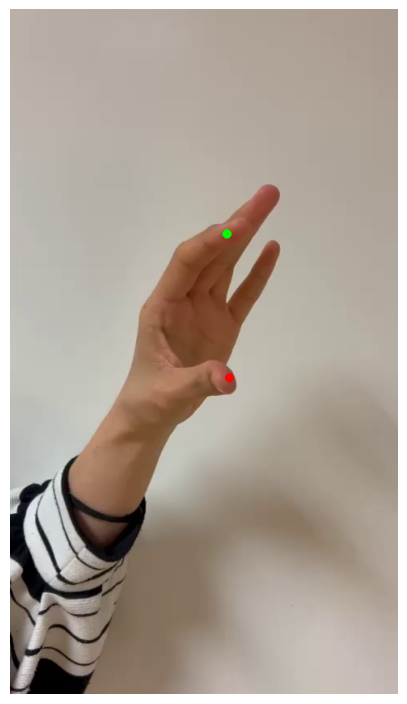

Ignoring empty camera frame.


In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

lst_dist_amplitude = []
show_plot = True

# For video input:

video_path = 'video_bueno.mp4'
cap = cv2.VideoCapture(video_path)
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()

    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break

    height, width = image.shape[:2]

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True

    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:

        th_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * width)
        th_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * height)

        idx_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * width)
        idx_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * height)

        d_eucl = np.sqrt((th_x - idx_x)**2 + (th_y - idx_y)**2)
        lst_dist_amplitude.append(d_eucl)

        cv2.circle(image, (th_x, th_y), 3,(255,0,0),3)
        cv2.circle(image, (idx_x, idx_y), 3,(0,255,0),3)

    if show_plot:
      plt.figure(figsize=(5,10))
      plt.imshow(cv2.flip(image, 1))
      plt.axis('off')
      plt.show()

    show_plot = False
    # Flip the image horizontally for a selfie-view display.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(10) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()


#### Se realizan los mismo cálculos para el video patológico.

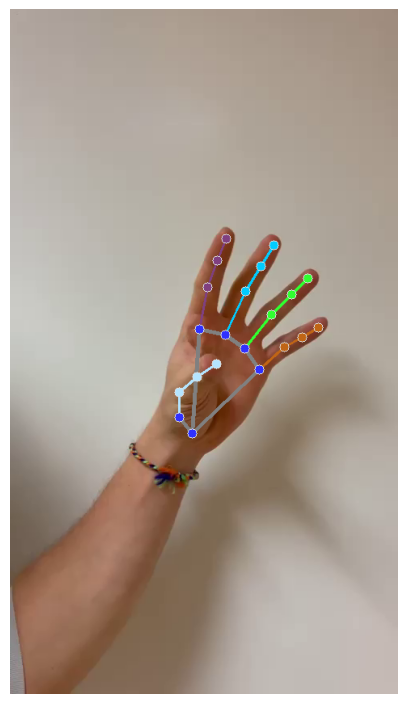

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

show_plot = True

# For video input:

video_path = 'video_malo.mp4'
cap = cv2.VideoCapture(video_path)
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True

    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    # Flip the image horizontally for a selfie-view display.

    if show_plot:
        plt.figure(figsize=(5,10))
        plt.imshow(cv2.flip(image, 1))
        plt.axis('off')
        plt.show()


    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    show_plot = False
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

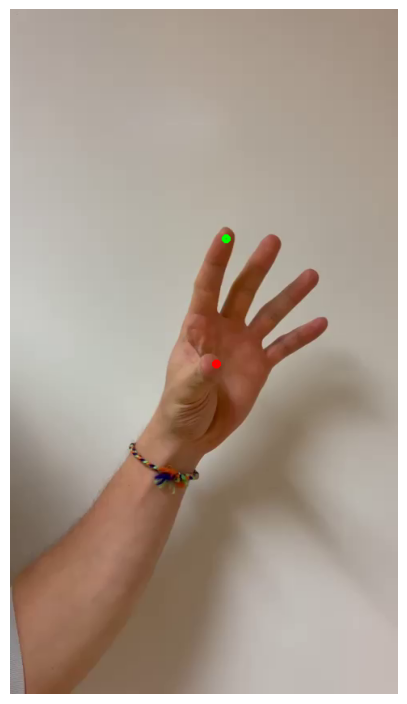

Ignoring empty camera frame.


In [6]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

lst_dist_amplitude_bad = []
show_plot = True
# For video input:

video_path = 'video_malo.mp4'
cap = cv2.VideoCapture(video_path)
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()

    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break

    height, width = image.shape[:2]

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True

    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:

        th_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * width)
        th_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * height)

        idx_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * width)
        idx_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * height)

        d_eucl = np.sqrt((th_x - idx_x)**2 + (th_y - idx_y)**2)
        lst_dist_amplitude_bad.append(d_eucl)

        cv2.circle(image, (th_x, th_y), 3,(255,0,0),3)
        cv2.circle(image, (idx_x, idx_y), 3,(0,255,0),3)

      if show_plot:
        plt.figure(figsize=(5,10))
        plt.imshow(cv2.flip(image, 1))
        plt.axis('off')
        plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    show_plot = False
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(1) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

### COMPARAR RESULTADOS

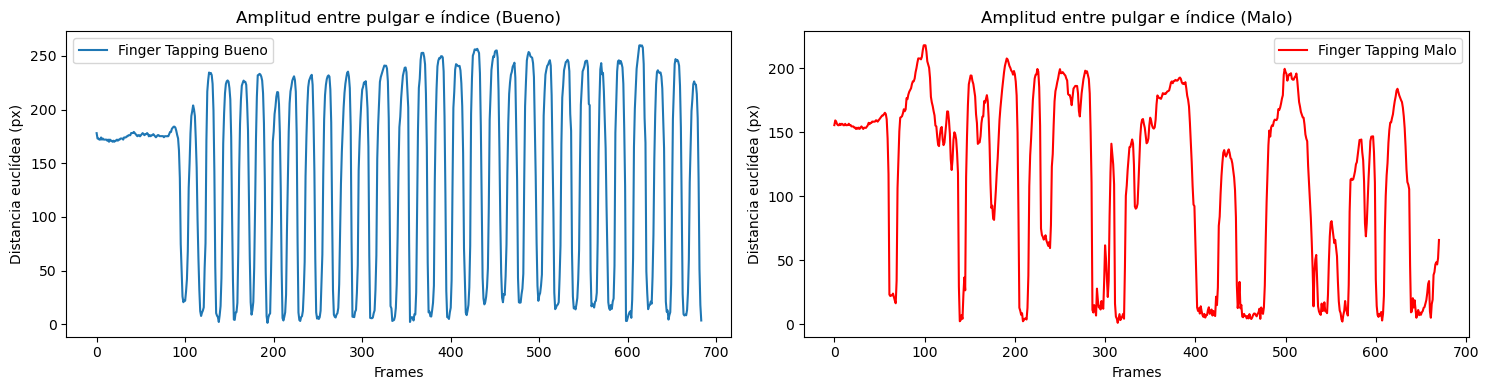

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(lst_dist_amplitude, label="Finger Tapping Bueno")
plt.xlabel("Frames")
plt.ylabel("Distancia euclídea (px)")
plt.title("Amplitud entre pulgar e índice (Bueno)")
plt.legend()

plt.subplot(122)
plt.plot(lst_dist_amplitude_bad, label="Finger Tapping Malo", color='red')
plt.xlabel("Frames")
plt.ylabel("Distancia euclídea (px)")
plt.title("Amplitud entre pulgar e índice (Malo)")
plt.legend()

plt.tight_layout()
plt.show()

##### Identificamos los taps generados en cada uno de ellos, en este caso, un tap se caracteriza por la menor distancia euclídea, por tanto, serán los mínimos.

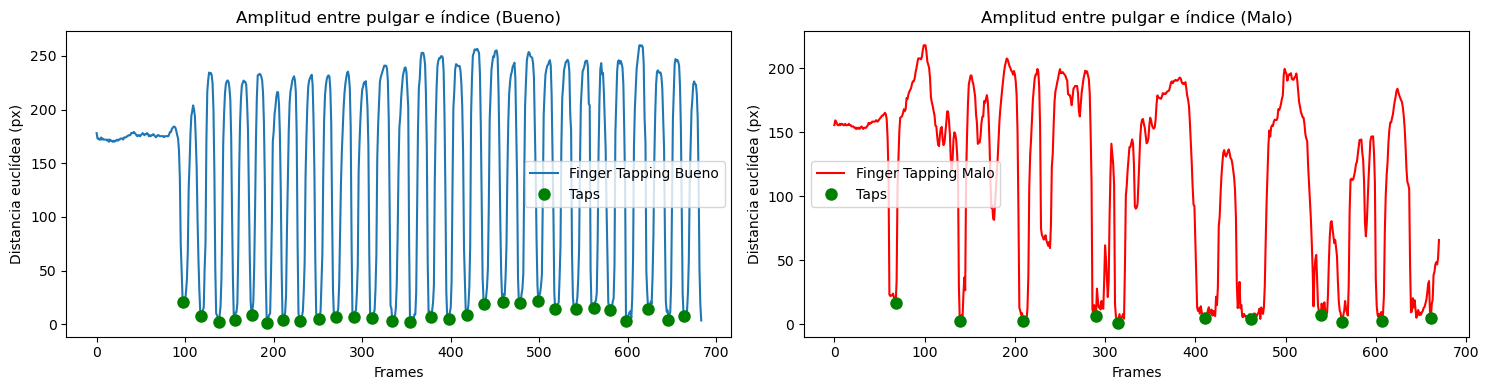

Número de taps en paciente no patológico: 29
Número de taps en paciente patológico: 11


In [26]:
lst_inver_good = -1 * np.array(lst_dist_amplitude)
lst_inver_bad = -1 * np.array(lst_dist_amplitude_bad)

min_good, _ = find_peaks(lst_inver_good, height=-50, distance= 18, prominence=55)
min_bad, _ = find_peaks(lst_inver_bad, height=-50, distance= 18, prominence=55)

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(lst_dist_amplitude, label="Finger Tapping Bueno")
plt.plot(min_good, [lst_dist_amplitude[i] for i in min_good], "o", label="Taps", markersize=8, color='green')
plt.xlabel("Frames")
plt.ylabel("Distancia euclídea (px)")
plt.title("Amplitud entre pulgar e índice (Bueno)")
plt.legend()

plt.subplot(122)
plt.plot(lst_dist_amplitude_bad, label="Finger Tapping Malo", color='red')
plt.plot(min_bad, [lst_dist_amplitude_bad[i] for i in min_bad], "o", label="Taps", markersize=8, color='green')
plt.xlabel("Frames")
plt.ylabel("Distancia euclídea (px)")
plt.title("Amplitud entre pulgar e índice (Malo)")
plt.legend()

plt.tight_layout()
plt.show()
print('Número de taps en paciente no patológico:', len(min_good))
print('Número de taps en paciente patológico:', len(min_bad))

#### CARACTERÍSTICAS DE INTERÉS

##### Se calcula la amplitud en cada tap junto con la amplitud media total. La amplitud serán los máximos en la señal representada.

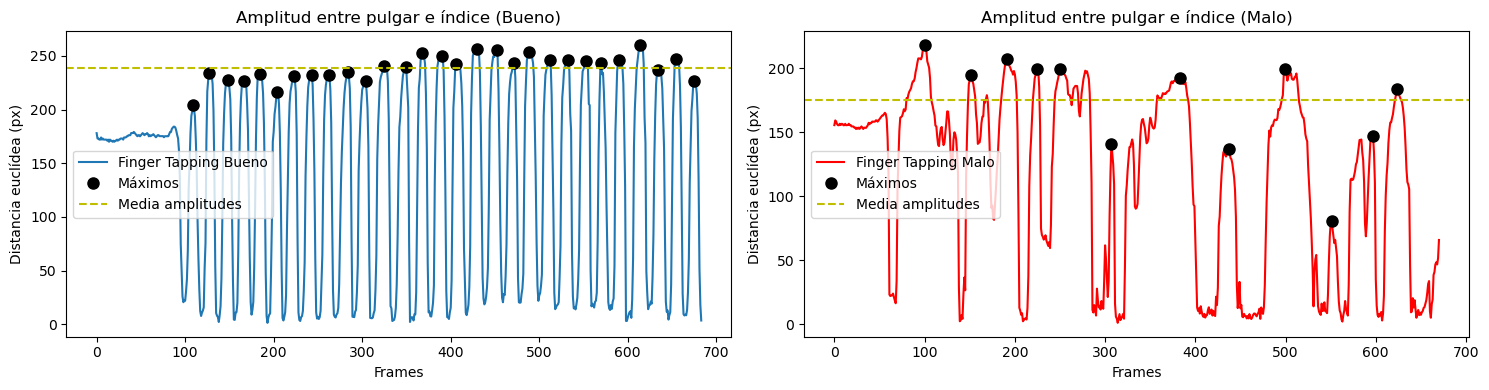

Amplitud media en paciente no patológico: 238.911
Amplitud media en paciente patológico: 174.901


In [35]:
max_good, _ = find_peaks(lst_dist_amplitude, height=-50, distance= 15, prominence=55)
max_bad, _ = find_peaks(lst_dist_amplitude_bad, height=-50, distance= 15, prominence=55)

ampl_good = [lst_dist_amplitude[i] for i in max_good]
ampl_avrg_good = np.sum(ampl_good)/len(ampl_good)

ampl_bad = [lst_dist_amplitude_bad[i] for i in max_bad]
ampl_avrg_bad = np.sum(ampl_bad)/len(ampl_bad)

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(lst_dist_amplitude, label="Finger Tapping Bueno")
plt.plot(max_good, [lst_dist_amplitude[i] for i in max_good], "o", label="Máximos", markersize=8, color='k')
plt.axhline(y=ampl_avrg_good, color='y', linestyle='--', label="Media amplitudes")
plt.xlabel("Frames")
plt.ylabel("Distancia euclídea (px)")
plt.title("Amplitud entre pulgar e índice (Bueno)")
plt.legend()

plt.subplot(122)
plt.plot(lst_dist_amplitude_bad, label="Finger Tapping Malo", color='red')
plt.plot(max_bad, [lst_dist_amplitude_bad[i] for i in max_bad], "o", label="Máximos", markersize=8, color='k')
plt.axhline(y=ampl_avrg_bad, color='y', linestyle='--', label="Media amplitudes")

plt.xlabel("Frames")
plt.ylabel("Distancia euclídea (px)")
plt.title("Amplitud entre pulgar e índice (Malo)")
plt.legend()

plt.tight_layout()
plt.show()

print('Amplitud media en paciente no patológico:', round(ampl_avrg_good,3))
print('Amplitud media en paciente patológico:', round(ampl_avrg_bad,3))

##### Se calcula la desviación estándar para conocer cómo de variables son las muestras.

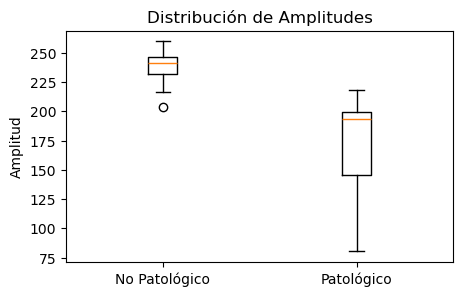

Amplitud media en paciente no patológico: 238.911 ± 12.336
Amplitud media en paciente patológico: 174.901 ± 38.529


In [41]:
plt.figure(figsize=(5, 3))
plt.boxplot([ampl_good, ampl_bad], tick_labels=["No Patológico", "Patológico"])
plt.title("Distribución de Amplitudes")
plt.ylabel("Amplitud")
plt.show()

std_dev_good = np.std(ampl_good)
std_dev_bad = np.std(ampl_bad)

print('Amplitud media en paciente no patológico:', round(ampl_avrg_good,3), '±', round(std_dev_good,3))
print('Amplitud media en paciente patológico:', round(ampl_avrg_bad,3), '±', round(std_dev_bad,3))

##### Se calcula el titubeo del paciente analizando el ruido presente en la señal. Para ello se estima la SNR.

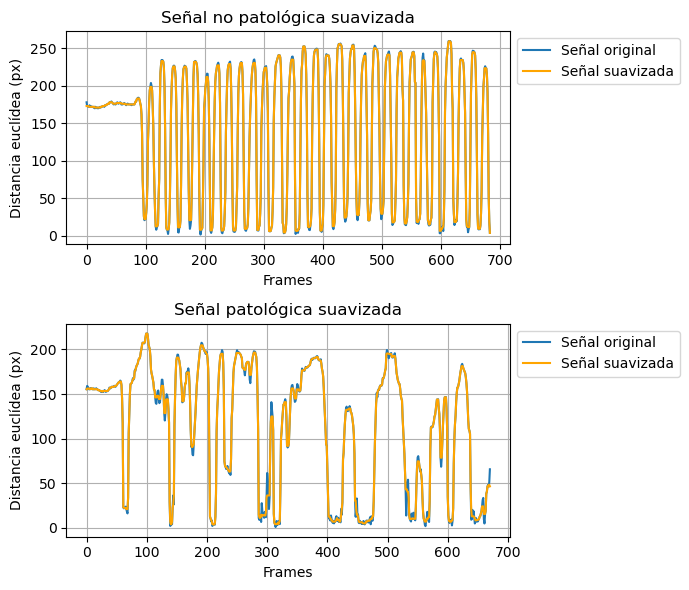

In [78]:
smoothed_signal = medfilt(lst_dist_amplitude, 5)
smoothed_signal_bad = medfilt(lst_dist_amplitude_bad, 5)

fig, axes = plt.subplots(2, 1, figsize=(7, 6))

# Primer conjunto de datos
axes[0].plot(lst_dist_amplitude, label='Señal original')
axes[0].plot(smoothed_signal, label='Señal suavizada', color='orange')
axes[0].set_title('Señal no patológica suavizada')
axes[0].set_xlabel('Frames')
axes[0].set_ylabel('Distancia euclídea (px)')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].grid()

# Segundo conjunto de datos
axes[1].plot(lst_dist_amplitude_bad, label='Señal original')
axes[1].plot(smoothed_signal_bad, label='Señal suavizada', color='orange')
axes[1].set_title('Señal patológica suavizada')
axes[1].set_xlabel('Frames')
axes[1].set_ylabel('Distancia euclídea (px)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].grid()

plt.tight_layout()
plt.show()

In [79]:
def estim_snr(signal, kernel_size=5):
    signal_power = np.var(signal)
    smoothed_signal = medfilt(signal, kernel_size)
    noise = signal - smoothed_signal
    noise_power = np.var(noise)

    # SNR estimated
    snr = 10 * np.log10(signal_power / noise_power)

    return snr

In [80]:
snr_good = round(estim_snr(lst_dist_amplitude),3)
snr_bad = round(estim_snr(lst_dist_amplitude_bad), 3)
print('SNR estimado paciente no patológico:',snr_good, 'dB')
print('SNR estimado paciente patológico:',snr_bad, 'dB')

SNR estimado paciente no patológico: 36.136 dB
SNR estimado paciente patológico: 26.78 dB


##### Menor SNR mayor cantidad de ruido afecta a la señal.

##### Se procede a calcular la frecuencia de Taps por segundo.

In [86]:
video_path = 'video_bueno.mp4'
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
time_good = frames / fps
cap.release()

video_path = 'video_malo.mp4'
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
time_bad = frames / fps
cap.release()


taps_s_good = len(min_good)/time_good
taps_s_bad = len(min_bad)/frames
print('Paciente no patológico:', taps_s_good, '(taps/s)')
print('Paciente patológico:', taps_s_bad, '(taps/s)')

Paciente no patológico: 2.541258945523587 (taps/s)
Paciente patológico: 0.01639344262295082 (taps/s)


##### Se observa si el paciente sigue una amplitud constante o decae según avanza la prueba.

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def plot_linearity_1d(points):
    y = np.array(points)
    X = np.arange(len(y)).reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    r2 = r2_score(y, model.predict(X))
    linearity_percent = r2 * 100

    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Máximos')
    plt.plot(X, model.predict(X), color='red', label='Línea de regresión')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

    return linearity_percent

No patológico


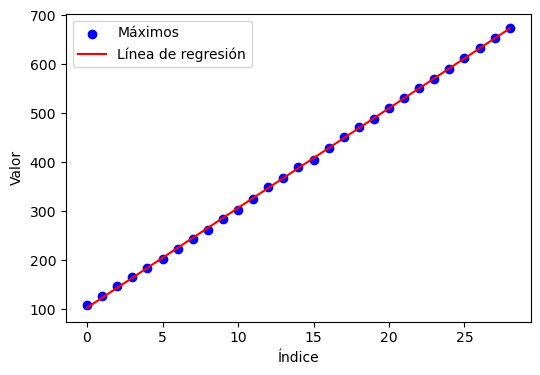

Patológico


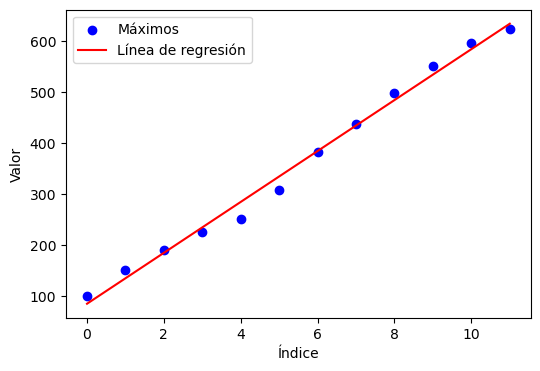

In [97]:
print('No patológico')
linear_ampl_good = plot_linearity_1d(max_good)
print('Patológico')
linear_ampl_bad = plot_linearity_1d(max_bad)

In [94]:
print('Amplitud similitud a recta en paciente no patológico:', round(linear_ampl_good,3), '%')
print('Amplitud similitud a recta en paciente patológico:', round(linear_ampl_bad,3), '%')

Amplitud similitud a recta en paciente no patológico: 99.98 %
Amplitud similitud a recta en paciente patológico: 99.073 %


##### En este estudio no se simuló la pérdida de amplitud, sin embargo, puede ser un valor importante en la práctica clínica y además aun así, se observan ciertas diferencnias.

##### La idea principal es usar todas las características de interés implementadas para determinar un umbral a partir del cual considerar al paciente patológico. Además, al tener numerosas características se puede desarrollar un sistema de votación atendiendo a las características propuestas.